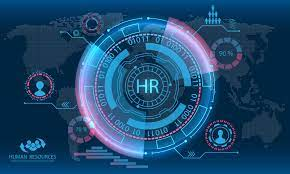

In [ ]:
import pandas as pd
import pandas_profiling 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_test = pd.read_csv("/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_test.csv")
df_train = pd.read_csv("/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv")

In [ ]:
df_train.head()

### benefit of pandas profiling.

* Pandas-profiling brings all the bricks together to a complete EDA:
* Most frequent values, missing values, correlations, quantile and descriptive statistics, data length and more.
* you'll quickly see the distribution and disparity of your data.

In [ ]:
df_train.profile_report(title = 'HR Analytics: Job Change of Data Scientists')

## From the report i saw that many colums are missing values.

### Fill these values with the variable. 

In [ ]:
df_train["experience"].fillna("0" , inplace = True)

In [ ]:
df_train.fillna("Unknown" , inplace=True)

## We will first estimate how many people are looking for a new job or not with help of Target column.

##  Target

* 0 – Not looking for job change
* 1 – Looking for a job change

As you can see, here we have imbalanced data, the number of 1 ( Looking for a job change) < 0 (Not looking for job change)

#### Looking at the target column of data  we can say that fewer people are looking for a job change Maximum people satisfied from his jod.

# Data Visualization.

In [ ]:
target = df_train["target"].value_counts()
target.plot.bar(title = 'Target' , ylabel = 'num_of_people' , color = ["pink" , "red"])

# Gender looking for a new job?

### Mostly Male are looking for a new job.

In [ ]:
df_train[df_train["target"] == 1]["gender"].value_counts()

In [ ]:
gender = df_train["gender"].value_counts()

In [ ]:
gender.plot.pie(figsize = (9,9) ,autopct='%1.2f%%' ,  colors = ["pink" , "brown" , "silver" , "grey"] , 
                title = 'Gender looking for a new job')
plt.show()

# People with relevant experience are looking for a new job?

In [ ]:
experience = df_train["relevent_experience"].value_counts()

experience.plot.pie(autopct='%1.1f%%' , figsize = (9,9) , title = 'experience')
plt.ylabel("")

In [ ]:
df_train.head()

## So it's seems like most people who are currently doing job haven't enrolled in any university.

In [ ]:
df_train[df_train["target"] == 1]["enrolled_university"].value_counts()

In [ ]:
enrolled = df_train["enrolled_university"].value_counts()
enrolled.plot.bar(title = 'enrollment' , ylabel = "number_of_enrollment" , 
                  color = ["brown" , "red" , "purple" , 'Green'] , figsize = (8,6))


# Education Level
This dataset contains 5 education level:

* Graduate
* Masters
* High School
* PhD
* Primary School

## Mostly Graduates are looking for a new job.

In [ ]:
df_train[df_train["target"] == 1]["education_level"].value_counts()

In [ ]:

edu_level = df_train["education_level"].value_counts()
edu_level.plot.bar(title = "Education_Level" , xlabel = 'education_category' , ylabel = 'num_of_people' , 
color = ["blue" , "purple" , "red" , "grey" , "orange"] , figsize = (8,6))

* Removing > and < sign from experience column beacuse kde plot was not being formed because of them.for continuos values kde plot is required.

In [ ]:
df_train["experience"] = df_train["experience"].str.strip(">").str.strip("<")

#### You can see in chart num 3 and expalanation in line num 3.

In [ ]:
df_train[df_train["target"] == 1]["experience"].value_counts().head()

#### You can see in chart num 1 and expalanation in line num 1.

In [ ]:
df_train[df_train["target"] == 1]["major_discipline"].value_counts().head()

#### You can see in chart num 4 and expalanation in line num 4.

In [ ]:
df_train["training_hours"].mean()

# Different plots in one cell easy to Analyze the data.

* 1  In Major Discipilane column maximum peoples who are looking for a new job are those who are belonging to STEM category shown in 'pie chart'.
* 2  In Education_level column we can see that maximum people go into Data science world are Graduates shown in 'bar chart'.
* 3  In Experience column we can see that mostly experience of more that 20 years also looking for a new job. shown in 'count plot.
* 4  In Training hours column average peoples training hours are 65 hours shown in 'distribution plot.

In [ ]:
fig , ax = plt.subplots(nrows = 2,ncols = 2 , figsize = (9,10) , constrained_layout=True)
ax1,ax2, ax3, ax4 = ax.flatten()

# top left

major_discipilane = df_train["major_discipline"].value_counts()

major_discipilane.plot.pie(figsize = (20,20) , title = 'major_discipline', ax = ax1 , ylabel = "" , autopct='%1.1f%%')
plt.ylabel("")

# top right

edu_level = df_train["education_level"].value_counts()
edu_level.plot.bar(title = "Education_Level"   , 
color = ["Green" , "purple" , "red" , "grey" , "orange"] , ax = ax2  , rot = 45)
for i in ["top", "right" ]:
    ax2.spines[i].set_visible(False)

# bottom left

sns.countplot(df_train["experience"] , ax = ax3 )
# ax3.set(xlabel='Experience')

for i in ["top", "right" ]:
    ax3.spines[i].set_visible(False)

# bottom right
sns.distplot(df_train["training_hours"] , color = 'purple' , ax = ax4)
for i in ["top", "right" ]:
    ax4.spines[i].set_visible(False)
plt.show()

### 15.45568430942687 % Maximum people who have relevant experience are looking for a new job. 
### 9.479068796325295 % of not having relevant experience who are looking for a new job.

In [ ]:
sns.countplot(df_train["relevent_experience"] , hue = df_train["target"])

In [ ]:
yes_newjob = df_train[(df_train['relevent_experience']=='Has relevent experience') & df_train['target']==1]
no_newjob = df_train[(df_train['relevent_experience']=='No relevent experience') & df_train['target']==1]

#string formatting.
print('{} % of having relevant experience who are looking for a new job'
      .format(len(yes_newjob)/len(df_train['relevent_experience']=='Has relevent experience')*100))
print('{} % of not having relevant experience who are looking for a new job'
      .format(len(no_newjob)/len(df_train['relevent_experience']=='No relevent experience')*100))

# Maximum Peoples who are working in private companies are looking for a new job.

In [ ]:
df_train[df_train["target"] == 1]['company_type'].value_counts()[1:]

In [ ]:
company = df_train["company_type"].value_counts()
company.plot.pie(figsize = (9,12) , autopct='%1.1f%%' , title = "Company_Type")

### Most people who haven't worked for a year are looking for a new job.
### Secondly those people who has not job yet.

In [ ]:
df_train[df_train["target"] == 1]['last_new_job'].value_counts()

In [ ]:
df_train["last_new_job"].value_counts().plot.pie(figsize = (9,12) , autopct='%1.1f%%' , title = "Last_New_Job" , 
                                colors = ["grey" , "pink" , "red" , "green" , "blue" , "purple" , "orange"])

## Further analysis is ongoing.
### if you like my notebook plz upvote!